In [465]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [466]:
df = pd.read_csv('Credit.csv')

In [467]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [468]:
df.drop(columns='Unnamed: 0', inplace=True)

In [469]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [470]:
df['Education'].value_counts()

16    50
15    49
14    48
13    38
12    37
17    34
11    33
9     25
10    24
18    22
8     14
19    10
7      8
6      5
20     2
5      1
Name: Education, dtype: int64

In [471]:
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [473]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


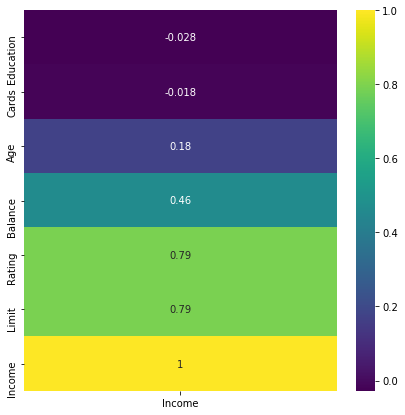

In [474]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr()[['Income']].sort_values('Income'), annot=True, cmap='viridis')

#### Let's binarize the 'Gender' column where Female is 0 and Male is 1:

In [475]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [476]:
df['Gender'].value_counts()

0    207
1    193
Name: Gender, dtype: int64

#### Let's do the same for 'Student' & 'Married' columns

In [477]:
df['Married'] = df['Married'].apply(lambda x: 1 if x == 'Yes' else 0)

In [478]:
df['Married'].value_counts()

1    245
0    155
Name: Married, dtype: int64

In [479]:
df['Student'] = df['Student'].apply(lambda x: 1 if x == 'Yes' else 0)

In [480]:
df['Student'].value_counts()

0    360
1     40
Name: Student, dtype: int64

In [481]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
1,106.025,6645,483,3,82,15,0,1,1,Asian,903
2,104.593,7075,514,4,71,11,1,0,0,Asian,580
3,148.924,9504,681,3,36,11,0,0,0,Asian,964
4,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


In [482]:
df['Cards'].value_counts()

2    115
3    111
4     72
1     51
5     34
6     11
7      4
9      1
8      1
Name: Cards, dtype: int64

#### Technically you could make dummies for each 'Card' value, but let's bin them instead to reduce the number of dummies:
    - Write a function that will make bins for those who have 3 cards or less, 4-6 cards and over 6 cards

In [483]:
def bins(x):
    if x > 6:
        return 'high'
    if x <= 3:
        return 'low'
    elif x > 3 & x <=6:
        return 'medium'
    else:
        return 'something went wrong'

In [484]:
df['Cards'] = df['Cards'].apply(bins)

In [485]:
df['Cards'].value_counts()

low       277
medium    117
high        6
Name: Cards, dtype: int64

In [486]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,low,34,11,1,0,1,Caucasian,333
1,106.025,6645,483,low,82,15,0,1,1,Asian,903
2,104.593,7075,514,medium,71,11,1,0,0,Asian,580
3,148.924,9504,681,low,36,11,0,0,0,Asian,964
4,55.882,4897,357,low,68,16,1,0,1,Caucasian,331


#### How would we interpret the format of the 'Education' column? Let's bin these as well...
    - Elementary (8 or less)
    - Highschool (9-12)
    - Undergrad (12-16)
    - Graduate (16+)

In [487]:
df['Education'].value_counts()

16    50
15    49
14    48
13    38
12    37
17    34
11    33
9     25
10    24
18    22
8     14
19    10
7      8
6      5
20     2
5      1
Name: Education, dtype: int64

In [488]:
def ed(x):
    if x <= 8:
        return 'elementary'
    elif x >= 9 and x <= 12:
        return 'highschool'
    elif x > 12 and x <= 16:
        return 'undergrad'
    elif x > 16:
        return 'graduate'
    else:
        return 'oops'

In [489]:
df['Education'] = df['Education'].apply(ed)

In [490]:
df['Education'].value_counts()

undergrad     185
highschool    119
graduate       68
elementary     28
Name: Education, dtype: int64

#### What about the 'Ethnicity' column? Do we use this?? What ethical concerns should we be considering with variables like ethnicity, & gender?

In [491]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [492]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,low,34,highschool,1,0,1,Caucasian,333
1,106.025,6645,483,low,82,undergrad,0,1,1,Asian,903
2,104.593,7075,514,medium,71,highschool,1,0,0,Asian,580
3,148.924,9504,681,low,36,highschool,0,0,0,Asian,964
4,55.882,4897,357,low,68,undergrad,1,0,1,Caucasian,331


#### Let's create some dummies for 'Cards', 'Education' and 'Ethnicity'?

In [493]:
dummies = pd.get_dummies(df[['Cards', 'Education', 'Ethnicity']], drop_first = True)

In [494]:
dummies.head()

,Cards_low,Cards_medium,Education_graduate,Education_highschool,Education_undergrad,Ethnicity_Asian,Ethnicity_Caucasian
0,1,0,0,1,0,0,1
1,1,0,0,0,1,1,0
2,0,1,0,1,0,1,0
3,1,0,0,1,0,1,0
4,1,0,0,0,1,0,1


In [495]:
df_dummies = pd.concat([df, dummies], axis = 1)

In [496]:
df_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Cards_low,Cards_medium,Education_graduate,Education_highschool,Education_undergrad,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,low,34,highschool,1,0,1,Caucasian,333,1,0,0,1,0,0,1
1,106.025,6645,483,low,82,undergrad,0,1,1,Asian,903,1,0,0,0,1,1,0
2,104.593,7075,514,medium,71,highschool,1,0,0,Asian,580,0,1,0,1,0,1,0
3,148.924,9504,681,low,36,highschool,0,0,0,Asian,964,1,0,0,1,0,1,0
4,55.882,4897,357,low,68,undergrad,1,0,1,Caucasian,331,1,0,0,0,1,0,1


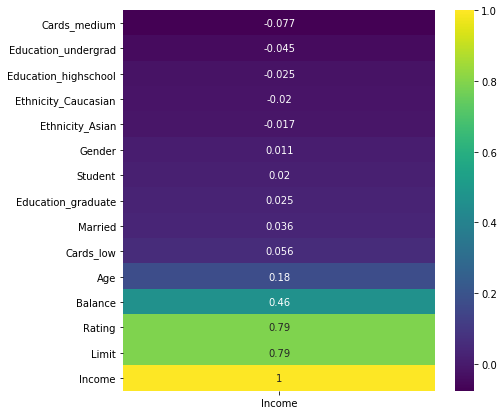

In [497]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_dummies.corr()[['Income']].sort_values('Income'), annot=True, cmap='viridis')

In [498]:
df_dummies.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'Cards_low',
       'Cards_medium', 'Education_graduate', 'Education_highschool',
       'Education_undergrad', 'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

#### Create our features list

In [499]:
features = ['Limit', 'Rating', 'Age', 'Gender', 'Student', 'Married', 'Balance', 'Cards_low',
       'Cards_medium', 'Education_graduate', 'Education_highschool', 'Education_undergrad', 'Ethnicity_Asian', 'Ethnicity_Caucasian' ]

In [500]:
X = df_dummies[features]
y = df_dummies['Income']

In [501]:
df_dummies.shape

(400, 18)

#### Instantiate model and run a cross_val_score to see what kind of score we should be expecting

In [502]:
lr = LinearRegression()

In [503]:
cross_val_score(lr, X, y, cv= 3).mean()

0.9003897305599334

#### train test split

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

#### Fit and score model.   How does it do? How would you describe the model?

In [505]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [506]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9081772400804298, 0.8931777463662186)

#### Extra cross val score to check for consistency 

In [507]:
cross_val_score(lr, X_train, y_train, cv=3).mean()

0.8985639662478105

#### Let's scale our data...
    - For regular linear regression you don't need to scale your features, but when we use regularization (tomorrow!) you will need to scale your data.
    - We'll also be seeing a lot of different models throughout the course that require scaling before modeling
    - This shouldn't make any difference in our model scores here

#### What does StandardScaler do? 
 - It essentially creates z-scores for all the variables in our X matrix by setting out . mean to 0 and standard deviation to 1
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. 
- Mean and standard deviation are then stored to be used on later data using the transform method.

In [508]:
##Instantiate Standard Scaler

ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/heatherrobbins/env3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


#### Let's model on the scaled data... we should expect the same scores

In [509]:
linreg = LinearRegression()

In [510]:
linreg.fit(Xs_train, y_train)
linreg.score(Xs_train, y_train)

0.9081772400804298

In [511]:
linreg.score(Xs_test, y_test)

0.8931777463662184